In [1]:
import pandas as pd
import pickle

In [2]:
%%time
july = pd.read_csv('../data/july.csv')
july.head()

Wall time: 22.3 s


,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-07-01 00:00:33.550000,36.156678,-86.809004,Powered635135,Powered,22.0,scooter,0.15,Lyft
1,2019-07-01 00:00:34.973000,36.145674,-86.794138,Powered790946,Powered,33.0,scooter,0.15,Lyft
2,2019-07-01 00:00:41.183000,36.179319,-86.751538,Powered570380,Powered,76.0,scooter,0.15,Lyft
3,2019-07-01 00:00:41.620000,36.152111,-86.803821,Powered240631,Powered,43.0,scooter,0.15,Lyft
4,2019-07-01 00:00:45.087000,36.149355,-86.797550,Powered970404,Powered,52.0,scooter,0.15,Lyft


In [3]:
july.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25075445 entries, 0 to 25075444
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   sumdtype     object 
 5   chargelevel  float64
 6   sumdgroup    object 
 7   costpermin   float64
 8   companyname  object 
dtypes: float64(4), object(5)
memory usage: 1.7+ GB


In [4]:
july.isnull().sum()##CHARGE LEVEL COLUMN HAS 202 NULLS

pubdatetime      0
latitude         0
longitude        0
sumdid           0
sumdtype         0
chargelevel    202
sumdgroup        0
costpermin       0
companyname      0
dtype: int64

In [5]:
july.companyname.unique()

array(['Lyft', 'Bird', 'Spin', 'Bolt', 'Jump', 'Lime', 'Gotcha'],
      dtype=object)

In [6]:
july.pubdatetime = pd.to_datetime(july.pubdatetime)
july.head(2)


,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-07-01 00:00:33.550,36.156678,-86.809004,Powered635135,Powered,22.0,scooter,0.15,Lyft
1,2019-07-01 00:00:34.973,36.145674,-86.794138,Powered790946,Powered,33.0,scooter,0.15,Lyft


In [7]:
july.sumdgroup.unique() ##produces all the unique values in the sumdgroup column


array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [8]:
july_scooters = july.loc[july.sumdgroup.isin(['scooter', 'Scooter'])]

In [9]:
july_scooters = july_scooters[['pubdatetime', 'latitude', 'longitude', 'sumdid', 'chargelevel', 'companyname']]

In [17]:
july_scooters = july.drop(columns=['costpermin']) ##drops columns chargelevel and cosstpermin from dataframe

In [18]:
july_scooters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25075445 entries, 0 to 25075444
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   sumdtype     object        
 5   chargelevel  float64       
 6   sumdgroup    object        
 7   companyname  object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 1.5+ GB


In [19]:
july_scooters.sumdid.nunique() ##count the number of unique sumdid

6788

In [20]:
july_group=july_scooters.groupby(['companyname'])['sumdid'].nunique()
july_group

companyname
Bird      2583
Bolt       276
Gotcha     224
Jump      1206
Lime       903
Lyft      1026
Spin       570
Name: sumdid, dtype: int64

In [14]:
july_group=july_group.sort_values()
july_group

companyname
Gotcha     224
Bolt       276
Spin       570
Lime       903
Lyft      1026
Jump      1206
Bird      2583
Name: sumdid, dtype: int64

<AxesSubplot:title={'center':'Scooters by Company, July 2019'}, xlabel='companyname'>

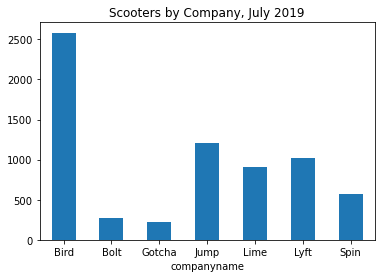

In [21]:
import matplotlib.pyplot as plt
july_group.plot.bar(x='companyname', y='sumdid', rot=0, title = 'Scooters by Company, July 2019')
##plt.show()

In [22]:
july_dead=july_scooters.loc[(july_scooters['chargelevel'] == 0.00)]
july_dead

,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,companyname
1301,2019-07-01 00:04:23.687,36.160017,-86.778196,Powered1676330,Powered,0.0,Scooter,Spin
1351,2019-07-01 00:04:23.687,36.011020,-86.684150,Powered4102727,Powered,0.0,Scooter,Spin
1364,2019-07-01 00:04:23.687,36.011000,-86.683970,Powered8566138,Powered,0.0,Scooter,Spin
1397,2019-07-01 00:04:23.687,36.147720,-86.740120,Powered1573562,Powered,0.0,Scooter,Spin
1424,2019-07-01 00:04:23.687,36.011120,-86.684000,Powered8106751,Powered,0.0,Scooter,Spin
...,...,...,...,...,...,...,...,...
25075287,2019-07-31 23:59:43.000,36.118800,-86.753500,Powereda72e8013-eaa2-54d5-a32d-0ea9066c7efe,Powered,0.0,scooter,Jump
25075290,2019-07-31 23:59:43.000,36.120000,-86.753100,Powereda52c64e6-2cad-5e1a-8f91-5882e2475466,Powered,0.0,scooter,Jump
25075291,2019-07-31 23:59:43.000,36.170700,-86.764300,Powered03eccca0-c690-5617-b967-1800fa512536,Powered,0.0,scooter,Jump
25075293,2019-07-31 23:59:43.000,36.213500,-86.763100,Powered96ff8edf-3972-5340-859c-cd0969a747de,Powered,0.0,scooter,Jump


In [23]:
july_dead_company =july_dead.value_counts(['companyname'])##NUMBER OF DEAD SCOOTERS BY COMPANY
july_dead_company 

companyname
Jump           3203358
Gotcha          581269
Spin             60360
Lime             34222
Bolt              4096
dtype: int64

In [24]:
july_dead=july_dead.value_counts(['companyname']).nunique() ##THE NUMBER OF COMPANIES WITH DEAD SCOOTERS
july_dead

5

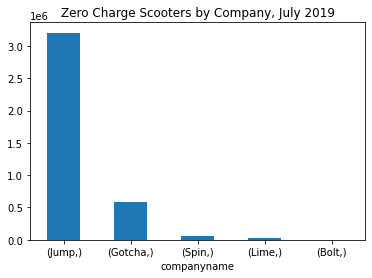

In [25]:
import matplotlib.pyplot as plt
july_dead_company.plot.bar(x='companyname', y='sumdid', rot=0, title = 'Zero Charge Scooters by Company, July 2019')
plt.show()
